In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

np.set_printoptions(suppress=True)  # 关闭科学计数法

In [2]:

data_csv = pd.read_csv("./filtered.csv")#读取filtered file
trajectory = np.array(data_csv, dtype=np.float64)  # trajectory1[:, 2:9] 原为2个数据 现为8个

In [33]:
"""一个时刻"""
# dataX, dataY = [], []
# # 定义滑动窗口的大小和步长
# window_size = 10
# step_size = 1
#  # 创建输入数据和目标数据
#  # 创建输入数据和目标数据
# for i in range(0, len(trajectory) - window_size, step_size):
#     dataX.append(trajectory[i:i+window_size])
#     dataY.append(trajectory[i+window_size,1:3])
# #  # 将输入数据和目标数据转换为numpy数组
# dataX = np.array(dataX, dtype='float64')
# dataY = np.array(dataY,dtype='float64')

"""两个时刻"""
dataX, dataY = [], []
window_size = 10
step_size = 1

for i in range(0, len(trajectory) - window_size - 1, step_size):
    dataX.append(trajectory[i:i+window_size])
    dataY.append(trajectory[i+window_size:i+window_size+2,1:3])
dataX = np.array(dataX, dtype='float64')
dataY = np.array(dataY,dtype='float64')

"""三个时刻"""
dataX, dataY = [], []
window_size = 10
step_size = 1
num_steps = 3

for i in range(0, len(trajectory) - window_size - num_steps + 1, step_size):
    dataX.append(trajectory[i:i+window_size])
    dataY.append(trajectory[i+window_size:i+window_size+num_steps,1:3])
dataX = np.array(dataX, dtype='float64')
dataY = np.array(dataY,dtype='float64')





print('dataX shape:', dataX.shape) # (2408, 10, 5)
print('dataY shape:', dataY.shape) # (91, 2)
# 使用transpose()方法交换第二维度和第三维度
dataX = dataX.transpose((0, 2, 1))
print('dataX shape:', dataX.shape)
# 原来：dataY shape: (2408, 2)

dataX shape: (2406, 10, 5)
dataY shape: (2406, 3, 2)
dataX shape: (2406, 5, 10)


In [34]:
# calculate distance based on haversine and time difference
# convert time to seconds

train_x = dataX
train_y= dataY

In [35]:
print(train_x)
print(train_y)

[[[     0.          1.          2.     ...      7.          8.
        9.    ]
  [679864.4007 679864.4159 679864.4315 ... 679864.5083 679864.5238
   679864.5391]
  [419283.8057 419284.144  419284.4826 ... 419286.1755 419286.5141
   419286.8528]
  [    11.12       11.12       11.12   ...     11.12       11.12
       11.12  ]
  [     0.          0.          0.     ...      0.          0.
        0.    ]]

 [[     1.          2.          3.     ...      8.          9.
       10.    ]
  [679864.4159 679864.4315 679864.4467 ... 679864.5238 679864.5391
   679864.5546]
  [419284.144  419284.4826 419284.8213 ... 419286.5141 419286.8528
   419287.1914]
  [    11.12       11.12       11.12   ...     11.12       11.12
       11.12  ]
  [     0.          0.          0.     ...      0.          0.
        0.    ]]

 [[     2.          3.          4.     ...      9.         10.
       11.    ]
  [679864.4315 679864.4467 679864.4623 ... 679864.5391 679864.5546
   679864.5699]
  [419284.4826 419284.82

In [36]:
import numpy as np
# convert pandas dataframe to numpy array

x_data = train_x
x_data = np.array(x_data)
# x_data = x_data.reshape(19828,5,1)
x_data.shape

(2406, 5, 10)

In [37]:
y_data = train_y

y_data.shape

(2406, 3, 2)

In [39]:
# Preporcessing Normalizing Valuse

from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range=(-1,1))
# new_df= x_data.reshape(x_data.shape[0],5)
x_data=x_data.reshape(2406,50)
new_x_data = sc.fit_transform(x_data)
new_x_data = new_x_data.reshape(2406,5,10)

print('X_data shape :', x_data.shape)
print('new X_data shape :', new_x_data.shape)


y_data=y_data.reshape(2406,6)
new_y_data = sc.fit_transform(y_data)
new_y_data = new_y_data.reshape(2406,3,2)
print('y_data shape :', y_data.shape)
print('new y_data shape :', new_y_data.shape)
# print(new_x_data)
print(new_y_data)

X_data shape : (2406, 50)
new X_data shape : (2406, 5, 10)
y_data shape : (2406, 6)
new y_data shape : (2406, 3, 2)
[[[-1.         -1.        ]
  [-1.         -1.        ]
  [-1.         -1.        ]]

 [[-0.99969315 -0.99884211]
  [-0.99968909 -0.99884273]
  [-0.99969506 -0.99884505]]

 [[-0.99938229 -0.99768388]
  [-0.99938421 -0.99768682]
  [-0.9993821  -0.99768907]]

 ...

 [[ 0.66973815  0.9943747 ]
  [ 0.66588038  0.99437934]
  [ 0.66201874  0.99438365]]

 [[ 0.66593164  0.99718701]
  [ 0.66207128  0.99719001]
  [ 0.65820904  0.99719131]]

 [[ 0.66212312  1.        ]
  [ 0.65826218  1.        ]
  [ 0.65439935  1.        ]]]


In [40]:
import tensorflow as tf
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers.recurrent import LSTM,RNN
from tensorflow.python.keras.layers.core import Dense, Activation, Dropout
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split


In [41]:
x_train, x_test, y_train, y_test = train_test_split(new_x_data, new_y_data, test_size=0.3, random_state=42)

In [42]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(1684, 5, 10)
(1684, 3, 2)
(722, 5, 10)
(722, 3, 2)


In [43]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from keras.models import Sequential, load_model
from keras.layers import Flatten, Dense, Embedding, LSTM, Dropout, Activation
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
# from tensorflow.keras.layers import GRU, lambda, Dense

In [46]:
# model = Sequential()
# hidden_size=64  #较小的 hidden_size，比如 64、128 或 256 等。而对于一些较为复杂的任务，比如机器翻译、语音识别等，可能需要使用更大的 hidden_size，比如 512、1024 或更大的值

# model.add(GRU(hidden_size, input_shape=(5,10), return_sequences=True))
# model.add(Lambda(lambda x: x[:, -1, :]))
# model.add(Dense(2))

#     # 编译模型
# model.compile(optimizer='Adam', loss='mse')
# import tensorflow as tf

# model = tf.keras.Sequential([
#     tf.keras.layers.GRU(units=32, input_shape=(window_size, num_features)),
#     tf.keras.layers.Dense(units=num_steps*output_dim),
#     tf.keras.layers.Reshape((num_steps, output_dim))
# ])

# 创建GRU模型
model = tf.keras.Sequential([
    tf.keras.layers.GRU(units=32, input_shape=(5,10)),
    tf.keras.layers.Dense(units=3*2),
    tf.keras.layers.Reshape((3, 2))
])

# 编译模型
model.compile(loss='mse', optimizer='adam')

model.summary()

'''
# LSTM层的units数：增加units数可以增加模型的表达能力，但也会增加模型的复杂度和训练时间。因此，可以尝试不同的units数并找到一个合适的值。

# Dropout层的比率：增加Dropout比率可以减少过拟合的风险，但过高的Dropout比率会影响模型的性能。因此，可以尝试不同的Dropout比率并找到一个合适的值。

# 学习率(learning rate)：Adam优化器默认的学习率通常可以正常工作，但有时候需要手动调整学习率以加速或稳定训练过程。

# 批量大小(batch size)：批量大小会影响模型的训练速度和内存占用情况。通常情况下，使用大批量大小可以加快训练速度，但也会占用更多的内存。

# 训练轮数(epochs)：增加训练轮数可以提高模型的精度，但也会增加训练时间。可以使用早停法(early stopping)等技术来提高模型的训练效率。
 '''
'''大数据集
model = tf.keras.Sequential([
    tf.keras.layers.GRU(units=128, return_sequences=True, input_shape=(seq_len, n_features)),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.GRU(units=64, return_sequences=True),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.GRU(units=32),
    tf.keras.layers.Dense(units=1)
])

'''

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
gru_1 (GRU)                  (None, 32)                4224      
_________________________________________________________________
dense_1 (Dense)              (None, 6)                 198       
_________________________________________________________________
reshape (Reshape)            (None, 3, 2)              0         
Total params: 4,422
Trainable params: 4,422
Non-trainable params: 0
_________________________________________________________________


'大数据集\nmodel = tf.keras.Sequential([\n    tf.keras.layers.GRU(units=128, return_sequences=True, input_shape=(seq_len, n_features)),\n    tf.keras.layers.Dropout(0.3),\n    tf.keras.layers.GRU(units=64, return_sequences=True),\n    tf.keras.layers.Dropout(0.3),\n    tf.keras.layers.GRU(units=32),\n    tf.keras.layers.Dense(units=1)\n])\n\n'

In [47]:

# 训练模型

history =model.fit(x=x_train, y=y_train, epochs=200,batch_size=32,validation_data=(x_test,y_test))

Epoch 1/200
53/53 [==============================] - 2s 9ms/step - loss: 0.2481 - val_loss: 0.0591
Epoch 2/200
53/53 [==============================] - 0s 3ms/step - loss: 0.0385 - val_loss: 0.0232
Epoch 3/200
53/53 [==============================] - 0s 3ms/step - loss: 0.0201 - val_loss: 0.0145
Epoch 4/200
53/53 [==============================] - 0s 3ms/step - loss: 0.0137 - val_loss: 0.0110
Epoch 5/200
53/53 [==============================] - 0s 3ms/step - loss: 0.0110 - val_loss: 0.0096
Epoch 6/200
53/53 [==============================] - 0s 3ms/step - loss: 0.0096 - val_loss: 0.0083
Epoch 7/200
53/53 [==============================] - 0s 3ms/step - loss: 0.0085 - val_loss: 0.0073
Epoch 8/200
53/53 [==============================] - 0s 3ms/step - loss: 0.0076 - val_loss: 0.0068
Epoch 9/200
53/53 [==============================] - 0s 3ms/step - loss: 0.0069 - val_loss: 0.0061
Epoch 10/200
53/53 [==============================] - 0s 3ms/step - loss: 0.0062 - val_loss: 0.0054
Epoch 11/

In [48]:
model.save("3stepPre.h5")

In [49]:
model = load_model("3stepPre.h5")
y_pred = model.predict(x_test)


In [50]:
result= y_pred

In [53]:
# # 设置打印选项，精度为3位小数
# np.set_printoptions(precision=5, suppress=True)
print(result.shape)
result=result.reshape(722,6)
res_df = sc.inverse_transform(result)
res_df = res_df.reshape(722,3,2)
# res_df.reshape(new_df.shape[0],5,1)
res_df
print(res_df.shape)
print(res_df)


(722, 3, 2)
(722, 3, 2)
[[[679956.2  419832.06]
  [679956.25 419832.72]
  [679956.4  419832.6 ]]

 [[679880.7  419467.28]
  [679880.6  419468.75]
  [679880.7  419467.16]]

 [[679878.9  419456.1 ]
  [679878.9  419456.  ]
  [679878.75 419456.38]]

 ...

 [[679865.3  419293.2 ]
  [679865.25 419292.9 ]
  [679865.1  419293.22]]

 [[679956.25 419831.8 ]
  [679956.25 419832.72]
  [679956.4  419832.34]]

 [[679956.25 419832.12]
  [679956.25 419832.94]
  [679956.4  419832.72]]]


In [54]:
y_test=y_test.reshape (722, 6)  #需要改的地方
# y_test_actual=sc.inverse_transform(y_test[2:3])
y_test_actual=sc.inverse_transform(y_test)
y_test_actual =y_test_actual.reshape(722,3,2)
print(y_test_actual)
print(y_test_actual.shape)
# for i in range(len(result)):
#     plt.scatter(result[0][i],result[1][i],c='r')
#     plt.scatter(y_test[0][i],y_test[1][i],c='g')

# plt.show()

[[[679955.8413 419832.2518]
  [679955.8413 419832.2524]
  [679955.8413 419832.253 ]]

 [[679880.7246 419468.8351]
  [679880.8194 419469.3234]
  [679880.9138 419469.8117]]

 [[679878.8796 419458.8895]
  [679878.8793 419458.8907]
  [679878.879  419458.8922]]

 ...

 [[679865.2743 419295.5764]
  [679865.2752 419295.5798]
  [679865.2761 419295.5831]]

 [[679955.8474 419832.1625]
  [679955.8474 419832.1631]
  [679955.8474 419832.1637]]

 [[679955.8444 419832.2107]
  [679955.844  419832.2113]
  [679955.844  419832.2116]]]
(722, 3, 2)


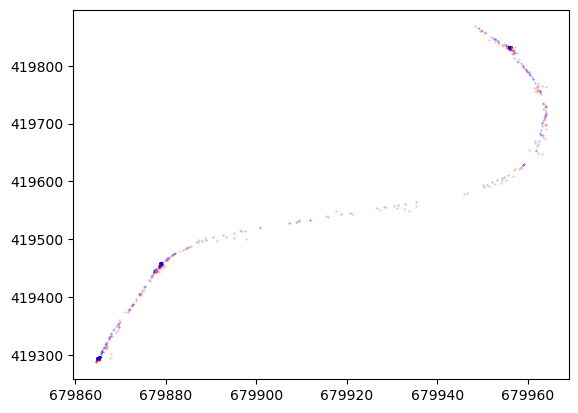

In [59]:
num_steps=3
output_dim =2

predicted_df = pd.DataFrame(data=res_df.reshape(-1, num_steps*output_dim), columns=['f'+str(i) for i in range(num_steps*output_dim)])
actual_df = pd.DataFrame(data=y_test_actual.reshape(-1, num_steps*output_dim), columns=['f'+str(i) for i in range(num_steps*output_dim)])

plt.scatter(x=predicted_df['f0'], y=predicted_df['f1'], c='r', s=0.1, alpha=0.5)
plt.scatter(x=actual_df['f0'], y=actual_df['f1'], c='b', s=0.1, alpha=0.5)

plt.show()

In [ ]:
# # 绘制预测值和实际值
# predicted_df = pd.DataFrame(data=res_df[0:,0:],index=[i for i in range(res_df.shape[0])],columns=['f'+str(i) for i in range(res_df.shape[1])])
# actual_df = pd.DataFrame(data=y_test_actual[0:,0:],index=[i for i in range(y_test_actual.shape[0])],columns=['f'+str(i) for i in range(y_test_actual.shape[1])])
# # for i in range(len(res_df)):
# # #   print(i)
# plt.scatter(x=predicted_df['f0'],y=predicted_df['f1'],c='r',s=0.1,alpha=0.5)
# plt.scatter(x=actual_df['f0'],y=actual_df['f1'],c='b',s=0.1,alpha=0.5)
# plt.show()


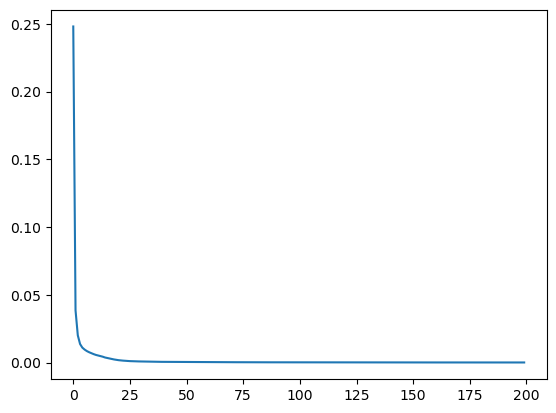

In [56]:
plt.plot(history.history['loss'])
plt.show()

In [ ]:
import numpy as np
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# 计算均方误差
mse = mean_squared_error(actual_df, predicted_df)
print("MSE:", mse)

# 计算平均绝对误差
mae = mean_absolute_error(actual_df, predicted_df)
print("MAE:", mae)

# 计算相关系数矩阵
corr_matrix = np.corrcoef(actual_df.T, predicted_df.T)
corr_coefficient = corr_matrix[0, 1] # 取出相关系数值
print("相关系数为：", corr_coefficient) # 打印相关系数
# 计算决定系数
r2 = r2_score(actual_df, predicted_df)
print("R^2:", r2)

import numpy as np

# 将实际值和预测值分别存储在矩阵中
actual_matrix = np.array(actual_df)
predicted_matrix = np.array(predicted_df)
correlation_matrix = np.corrcoef(actual_matrix, predicted_matrix, rowvar=False) # 计算相关系数（Pearson相关系数）
correlation_coefficient = correlation_matrix[0, 1] # 提取相关系数矩阵中的相关系数
print("Correlation coefficient:", correlation_coefficient) # 打印相关系数



In [65]:
#  #合并两个矩阵
# merged_matrix = np.concatenate((y_test_actual, res_df), axis=1)#真实,预测

# print(merged_matrix.shape) # 输出合并后矩阵的形状
# print(merged_matrix) 


# 分离预测值和实际值
predictions = res_df
actuals = y_test_actual

# 计算欧式距离
distances = np.sqrt(((predictions - actuals) ** 2).sum(axis=2))

# 打印结果
print(distances.shape)
print(distances)

# 计算每行的平均值
means = np.mean(distances, axis=1)

# 重塑数组形状
means_reshaped = means.reshape(-1, 1)

# 打印结果
print(means_reshaped.shape)
print(means_reshaped)

# 计算平均值
mean = np.mean(means_reshaped)

# 打印结果
print(mean)

(722, 3)
[[0.39457437 0.62009516 0.63320317]
 [1.55429284 0.60545761 2.66507531]
 [2.79575378 2.8907032  2.52050329]
 ...
 [2.3892054  2.67366876 2.3691733 ]
 [0.53346674 0.68617322 0.55747624]
 [0.414555   0.83198704 0.7342766 ]]
(722, 1)
[[ 0.5492909 ]
 [ 1.60827525]
 [ 2.73565342]
 [ 3.48152307]
 [ 2.05189822]
 [ 3.05862661]
 [ 0.6497607 ]
 [ 2.23937695]
 [ 2.7197929 ]
 [ 1.97756762]
 [ 3.3332519 ]
 [ 2.46437218]
 [ 2.74061195]
 [ 0.58108766]
 [ 1.59949504]
 [ 2.3949346 ]
 [ 1.02402466]
 [ 1.99413542]
 [ 1.86389337]
 [ 2.31458331]
 [ 2.05189822]
 [ 0.80371099]
 [ 2.27866867]
 [ 3.54327512]
 [ 3.18993213]
 [ 0.94467586]
 [ 2.93230594]
 [ 1.44806672]
 [ 2.06231442]
 [ 2.12480688]
 [ 2.63258261]
 [ 2.48770032]
 [ 1.66843803]
 [ 2.42701411]
 [ 2.66982717]
 [ 4.66343453]
 [ 2.16646739]
 [ 1.52001746]
 [ 7.01855597]
 [ 2.06231442]
 [ 1.98185201]
 [ 5.70777082]
 [ 2.53173585]
 [ 2.14147996]
 [ 2.48772416]
 [ 0.60616088]
 [ 1.32431458]
 [ 2.52450405]
 [ 2.15605121]
 [ 1.99868208]
 [ 4.80019